In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read CSV files
data = pd.read_csv('bike_rent (1).csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1


### Exploratory Data Analysis

In [3]:
# Check for null values
data.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [4]:
# Check for duplicates
data.duplicated().sum()

0

In [5]:
# List the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17379 non-null  object
 3   yr          17379 non-null  object
 4   mnth        17379 non-null  object
 5   hr          17379 non-null  int64 
 6   holiday     17379 non-null  object
 7   weekday     17379 non-null  int64 
 8   workingday  17379 non-null  object
 9   weathersit  17379 non-null  object
 10  temp        17379 non-null  object
 11  atemp       17379 non-null  object
 12  hum         17379 non-null  object
 13  windspeed   17379 non-null  object
 14  casual      17379 non-null  object
 15  registered  17379 non-null  object
 16  cnt         17379 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.3+ MB


#### Categories in each column

##### 1. instant

In [6]:
data['instant'].duplicated().any()

False

##### 2. dteday

In [7]:
# change data type for dteday to datetime type to see if there are any special characters
data['dteday'] = pd.to_datetime(data['dteday'], format = '%d-%m-%Y')
data['dteday'].dtype

dtype('<M8[ns]')

##### 3. Season, yr, mnth, holiday, weekday, workingday

In [8]:
col_replace = ['season', 'yr','mnth', 'holiday', 'weekday', 'workingday']
for col in col_replace:
    print(data[col].value_counts())
    print('\n')

season
fall        4496
summer      4409
springer    4236
winter      4232
?              6
Name: count, dtype: int64


yr
2012    8734
2011    8644
?          1
Name: count, dtype: int64


mnth
5     1488
7     1488
12    1482
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
?        1
Name: count, dtype: int64


holiday
No     16878
Yes      500
?          1
Name: count, dtype: int64


weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: count, dtype: int64


workingday
Working Day    11862
No work         5512
?                  5
Name: count, dtype: int64




###### weekday has no value ?, others need replacement based on date

In [9]:
# Find the date for which each column has a value of ?, then use that date to find what the actual column value shoulld replace '?' in each column

col_replace.remove('weekday') # weekday not required

for col in col_replace:
    date_wd = data[data[col] == '?']['dteday'] # dates where value for that column is '?'
    for date in date_wd:
        column_value = data[data['dteday'] == date][col].value_counts().idxmax(0) # the column value from other rows with same date
        # print(workingday_value) # just for checkjng
        data.loc[(data['dteday'] == date) & (data[col]  == '?'), col] = column_value

In [10]:
# Check fir '?' to all be replaced
for col in col_replace:
    print(data[col].value_counts())
    print('\n')

season
fall        4496
summer      4409
springer    4242
winter      4232
Name: count, dtype: int64


yr
2012    8734
2011    8645
Name: count, dtype: int64


mnth
5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: count, dtype: int64


holiday
No     16879
Yes      500
Name: count, dtype: int64


workingday
Working Day    11865
No work         5514
Name: count, dtype: int64




In [11]:
# replace ? in season with springer as mnth 1 in other instances is springer
data['season'] = data['season'].replace('springer', 'spring')
data['season'].value_counts()

season
fall      4496
summer    4409
spring    4242
winter    4232
Name: count, dtype: int64

In [12]:
# Make year and month of data type int
# data['yr'] = data['yr'].astype(int)
data['mnth'] = data['mnth'].astype(int)
data['yr'].dtype, data['mnth'].dtype

(dtype('O'), dtype('int32'))

##### 4. hr

In [13]:
data['hr'].value_counts()

hr
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: count, dtype: int64

##### 5. weathersit

In [14]:
data['weathersit'].value_counts()

weathersit
Clear         11412
Mist           4541
Light Snow     1419
?                 4
Heavy Rain        3
Name: count, dtype: int64

In [15]:
# replace ? with unavailable
data['weathersit'] = data['weathersit'].replace('?', 'unavailable') # each hour has its own weather, therefore use place holder unavailable
data['weathersit'].value_counts()

weathersit
Clear          11412
Mist            4541
Light Snow      1419
unavailable        4
Heavy Rain         3
Name: count, dtype: int64

##### 6. temp, atemp, hum, windspeed

In [16]:
# Temperature, normalized temperature, windspeed and humidity is interpolated over the specific day to replace '?'

col_interp = ['temp', 'atemp', 'hum', 'windspeed']
for col in col_interp:
    data[col] = data[col].replace('?', float('NaN')) # NaN is used, as interpolate function inetrpolates for NaN values
    data[col] = data[col].astype(float) # change object type to float for interpolation function

In [17]:
# Interpolate missing values over each day

for col in col_interp:
    data[col] = data[col].interpolate()

In [18]:
data[['temp','atemp','hum']].isnull().any()

temp     False
atemp    False
hum      False
dtype: bool

##### 7. casual, registered, cnt

In [19]:
# Check for missing values in casual
data[data['casual'] == '?'][['casual', 'registered', 'cnt']]

,casual,registered,cnt
12,?,?,84


In [20]:
# Check for missing values in registered
data[data['registered'] == '?'][['casual', 'registered', 'cnt']]

,casual,registered,cnt
12,?,?,84


In [21]:
# Check for missing values in cnt
data[data['cnt'] == '?'][['casual', 'registered', 'cnt']]

,casual,registered,cnt


In [22]:
# Replace ? with -1 which is an integer
data['casual'] = data['casual'].replace('?', -1)
data['casual'] = data['casual'].astype(int)

data['registered'] = data['registered'].replace('?', -1)
data['registered'] = data['registered'].astype(int)

data['cnt'] = data['cnt'].astype(int)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  object        
 4   mnth        17379 non-null  int32         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  object        
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int32         
 15  registered  17379 non-null  int32         
 16  cnt         17379 non-

#### Rename Columns

In [24]:
data.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'weathersit': 'weather', 'atemp': 'temp_feel', 'hum': 'humidity',
                    'cnt': 'count'}, inplace = True)

## Visualisation

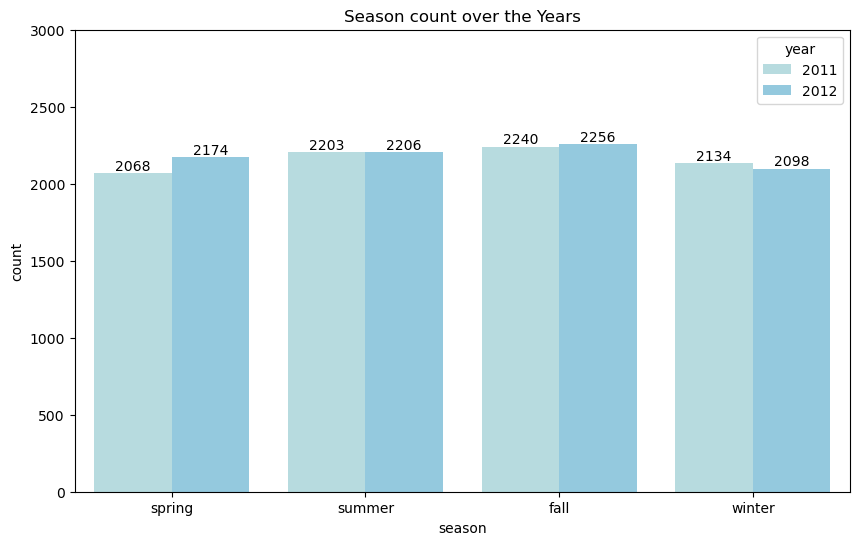

In [25]:
fig = plt.figure(figsize = (10,6))
ax = sns.countplot(data = data, x = 'season', hue = 'year', palette = ['powderblue', 'skyblue'])
plt.ylim(0,3000)
plt.title('Season count over the Years')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

### Total Count of bikes rented over different Seasons

In [26]:
# Seasona and year wise distribution
count_group = data.groupby(['year','season'])['count'].sum()
count_group

year  season
2011  fall      419650
      spring    150000
      summer    347316
      winter    326137
2012  fall      641479
      spring    321348
      summer    571273
      winter    515476
Name: count, dtype: int32

In [27]:
# Unstack the series
count_group_df = count_group.unstack(level = 0)
count_group_df

year,2011,2012
season,,
fall,419650,641479
spring,150000,321348
summer,347316,571273
winter,326137,515476


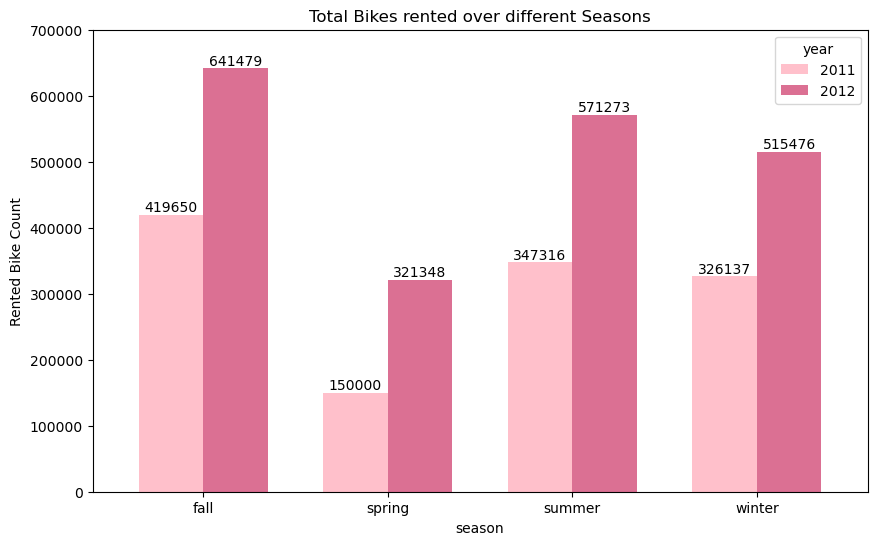

In [28]:
# Plot the graph
ax = count_group_df.plot(kind = 'bar', figsize = (10,6), color = ['pink', 'palevioletred'], rot = 0, width = 0.7)
plt.ylabel('Rented Bike Count')
plt.title('Total Bikes rented over different Seasons')
plt.ylim(0, 700000)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [29]:
# Remove the row in casual and registered columns which have the place holder value of -1. Its the same row for both
data_edit = data[data['casual'] != -1]
data_edit.shape


(17378, 17)

In [30]:
both_group = data_edit.groupby(['year','season'])[['casual','registered']].sum()
both_group

casual  registered
year season                    
2011 fall     95450      324200
     spring   21396      128520
     summer   77564      269752
     winter   52813      273324
2012 fall    130641      510838
     spring   39197      282151
     summer  125958      445315
     winter   76969      438507

In [31]:
both_group_df = both_group.unstack(level = 0)
both_group_df

casual         registered        
year     2011    2012       2011    2012
season                                  
fall    95450  130641     324200  510838
spring  21396   39197     128520  282151
summer  77564  125958     269752  445315
winter  52813   76969     273324  438507

In [32]:
# # Casual and Registered Users Bike rents over different Seasons
# both_group_df.plot(kind = 'bar', figsize = (10,6), color = ['sandybrown', 'lightgreen', 'coral' ,'mediumseagreen'], rot = 0, width = 0.7)
# plt.ylabel('Rented Bike Count')
# plt.title("Casual and Registered Users' Bike rents over different Seasons")
# plt.show()

#### The inference here is:
#### 1. Most bikes are rented in fall, followed by summer, winter and spring in that order
#### 2. Registred users rent the bikes more often that casual users

### Bikes rented by the hour over different Seasons

In [33]:
# Find total bikes rented over each hour of the day during each season
data_hour = data.groupby(['hour', 'season'])['count'].sum()
data_hour

hour  season
0     fall      13822
      spring     4878
      summer    10459
      winter     9971
1     fall       8132
                ...  
22    winter    21871
23    fall      22986
      spring     7994
      summer    17661
      winter    15300
Name: count, Length: 96, dtype: int32

In [34]:
data_hour_df = data_hour.unstack()
data_hour_df.sample(5)

season,fall,spring,summer,winter
hour,,,,
22,34416,12440,26885,21871
6,18946,7261,14549,14376
23,22986,7994,17661,15300
2,5716,2175,4302,4159
7,52000,20655,40753,40763


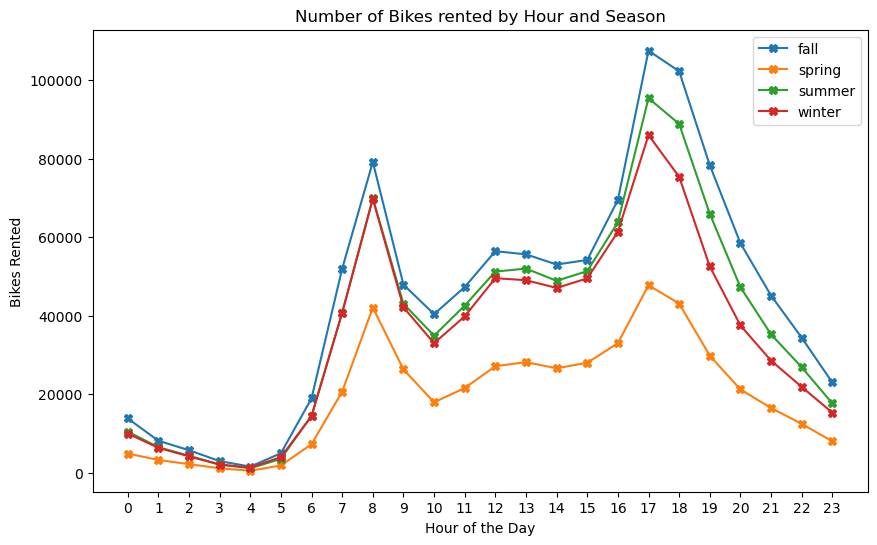

In [35]:
plt.figure(figsize=(10, 6))

for season in list(data_hour_df.columns):
    plt.plot(range(len(data_hour_df)), data_hour_df[season], label=season, marker = 'X')
plt.title('Number of Bikes rented by Hour and Season')
plt.xlabel('Hour of the Day')
plt.ylabel('Bikes Rented')
plt.xticks(range(0, len(data_hour_df), 1))
plt.legend()
plt.show()

#### Maximum bikes are rented at 5 PM, followed by 8 AM. Least amount of bikes are rented between 11PM and % AM

### Effect of Holiday on Bike Rent

In [36]:
holiday_count = data['holiday'].value_counts()
holiday_count

holiday
No     16879
Yes      500
Name: count, dtype: int64

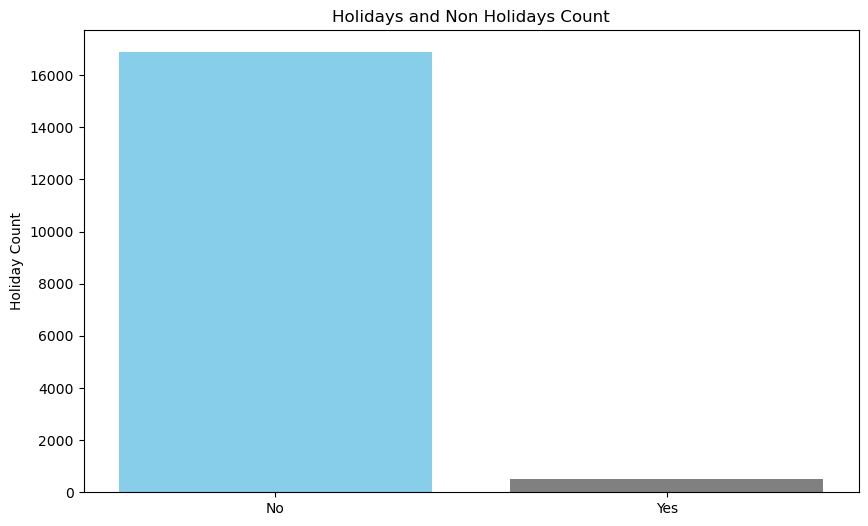

In [37]:
# Plot holiday Count
plt.figure(figsize = (10,6))
ax = plt.bar(holiday_count.index, holiday_count.values, color = ['skyblue', 'grey'] )
plt.title('Holidays and Non Holidays Count')
plt.ylabel('Holiday Count')
plt.show()

#### Non Holidays are significantly higher than holidays
#### We find mean of total bikes rented and not the total counts as holidays and non holidays are not equal

In [38]:
data_holiday = data.groupby(['holiday', 'season'])['count'].mean()
data_holiday

holiday  season
No       fall      235.976818
         spring    112.685875
         summer    208.428472
         winter    199.965998
Yes      fall      237.822917
         spring     72.042683
         summer    204.552083
         winter    167.722222
Name: count, dtype: float64

In [39]:
data_holiday_df= data_holiday.unstack(level= 0)
data_holiday_df

holiday,No,Yes
season,,
fall,235.976818,237.822917
spring,112.685875,72.042683
summer,208.428472,204.552083
winter,199.965998,167.722222


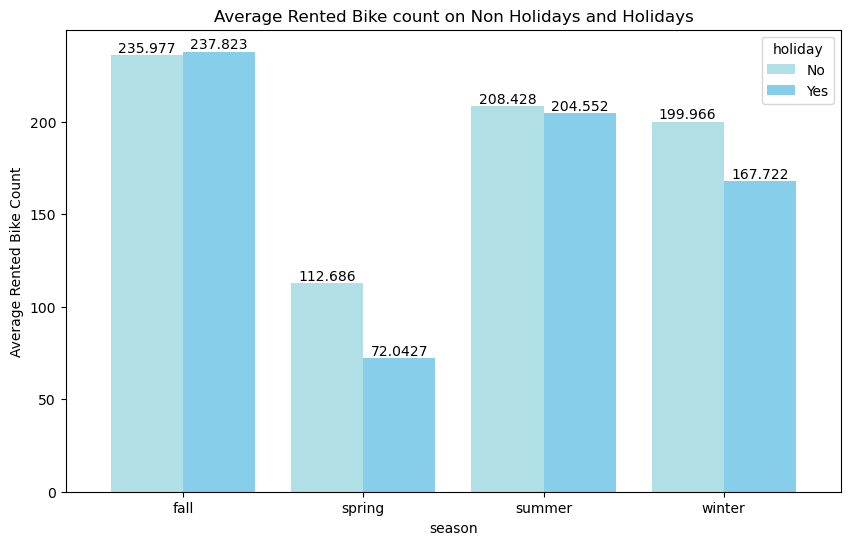

In [40]:
# Plot the graph
ax = data_holiday_df.plot(kind = 'bar', figsize = (10,6), color = ['powderblue', 'skyblue'], rot = 0, width = 0.8)
plt.ylabel('Average Rented Bike Count')
plt.title('Average Rented Bike count on Non Holidays and Holidays')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### Average count of rented bikes between holidays and non holidays is almost similar, except for a small difference in spring and winter where more bikes are hired on non-holidays
#### Holiday or No Holiday does not have a big effect on bikes rented

In [41]:
data_holiday_both = data_edit.groupby(['holiday', 'season'])[['casual','registered']].mean() # data_edit is used to remove row with -1 placeh holder
data_holiday_both

casual  registered
holiday season                       
No      fall    49.377955  186.598864
        spring  14.336031   98.356880
        summer  45.809413  162.619059
        winter  30.416341  169.549658
Yes     fall    91.958333  145.864583
        spring  13.079268   58.963415
        summer  61.937500  142.614583
        winter  37.777778  129.944444

In [42]:
data_holiday_both_df = data_holiday_both.unstack(level =0)
data_holiday_both_df

casual             registered            
holiday         No        Yes          No         Yes
season                                               
fall     49.377955  91.958333  186.598864  145.864583
spring   14.336031  13.079268   98.356880   58.963415
summer   45.809413  61.937500  162.619059  142.614583
winter   30.416341  37.777778  169.549658  129.944444

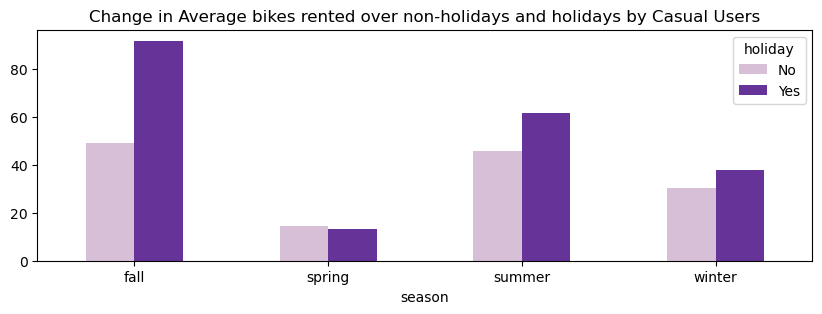

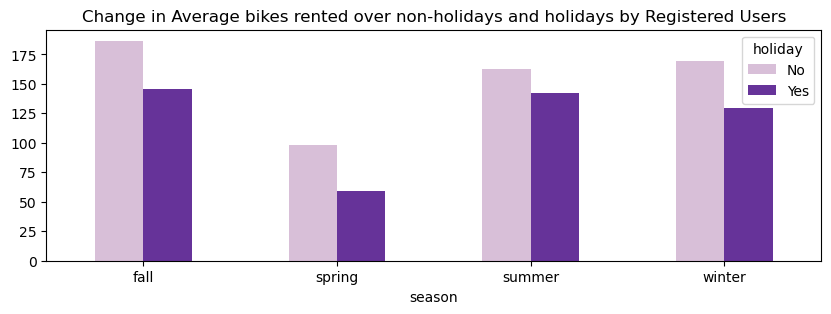

In [43]:
data_holiday_both_df['casual'].plot(kind = 'bar', color = [ 'thistle', 'rebeccapurple'], rot = 0, figsize=(10, 3) )
plt.title('Change in Average bikes rented over non-holidays and holidays by Casual Users')
print('\n')
data_holiday_both_df['registered'].plot(kind = 'bar', color = [ 'thistle', 'rebeccapurple'], rot = 0, figsize=(10, 3) )
plt.title('Change in Average bikes rented over non-holidays and holidays by Registered Users')
plt.show()

#### 1. More bikes were rented by casual users over holidays as compared with non- holidays
#### 2. Registered users rented more on non holidays

### Weekday and the bikes rented over different days

In [44]:
# Find average bikes rented over days of the week
data_weekday = data.groupby('weekday')['count'].mean()
data_weekday

weekday
0    177.468825
1    183.744655
2    191.238891
3    191.130505
4    196.436665
5    196.135907
6    190.209793
Name: count, dtype: float64

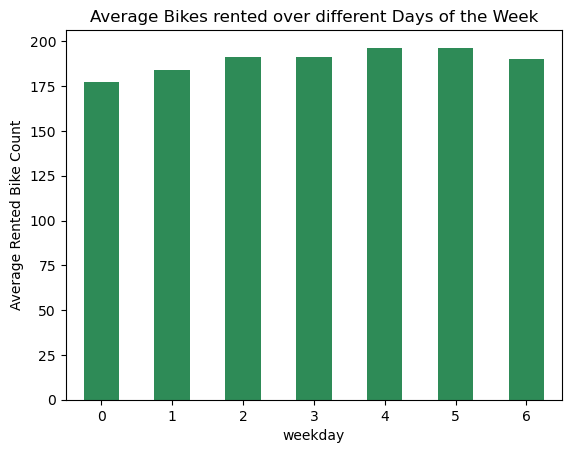

In [45]:
# plot for average bikes rented over days of week
data_weekday.plot(kind = 'bar', rot = 0, color = 'seagreen')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Bikes rented over different Days of the Week')
plt.show()

#### Average bikes rented over each day of the week are almost similar

### Weather Effects

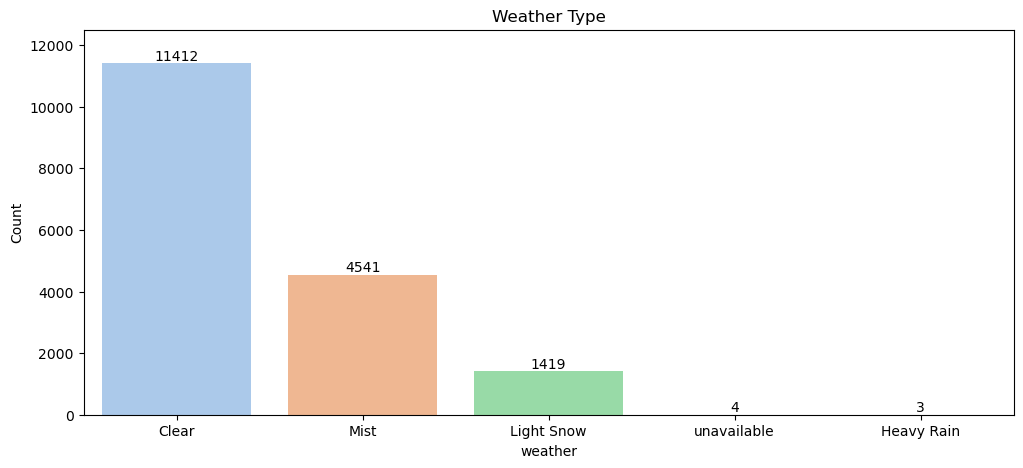

In [46]:
# Distribution of weather type
fig = plt.figure(figsize= (12,5))
ax = sns.countplot(data =data, x = 'weather', palette = 'pastel', order = data['weather'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Weather Type', fontsize =12)
plt.ylabel('Count')
plt.ylim(0,12500)
plt.show()

In [47]:
# Find average bikes rented based on weather
data_weather = data.groupby('weather')['count'].mean()
data_weather

weather
Clear          204.887049
Heavy Rain      74.333333
Light Snow     111.579281
Mist           175.260515
unavailable     24.000000
Name: count, dtype: float64

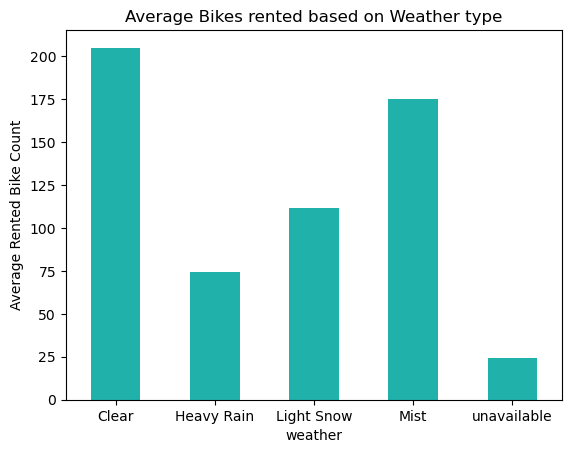

In [48]:
# Plot average bikes rented by the weather type
data_weather.plot(kind = 'bar', rot = 0, color = 'LightSeaGreen')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Bikes rented based on Weather type')
plt.show()

#### Most bikes are rented on a clear day, followed by a day with mist and then light snow. Leat amount of bikes are rented during heavy rains

### Temperature Variation

In [49]:
data_temp = data.groupby('weather')['temp'].apply(list)

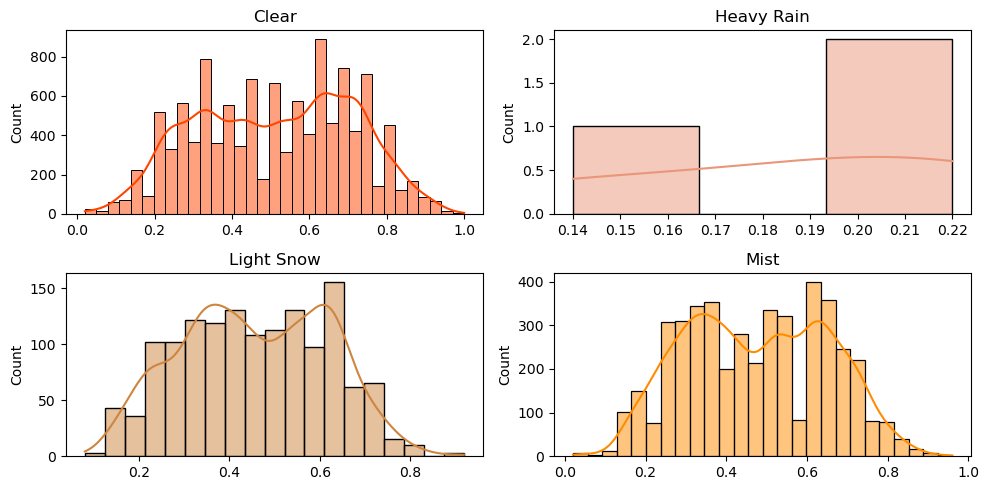

In [50]:
weather_type = ['Clear', 'Heavy Rain', 'Light Snow', 'Mist']
color = ['orangered', 'darksalmon', 'peru', 'darkorange']

fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axes = axes.flatten()
for i in range(len(weather_type)):
    sns.histplot(data_temp[weather_type[i]], kde=True, color=color[i], ax=axes[i])
    axes[i].set_title(weather_type[i])

plt.tight_layout()
plt.show()

#### On days when the weather is Clear, has Heavy Rain or Mist, the temperature has a variation across the spectrum. On Heavy Rain days however the tenperature varies between a normalised value of 0.22 and 0.14

### Humidity Variation

In [51]:
data_hum = data.groupby('weather')['humidity'].apply(list)
data_hum

weather
Clear          [0.81, 0.8, 0.775, 0.75, 0.75, 0.86, 0.75, 0.7...
Heavy Rain                                    [0.93, 0.86, 0.86]
Light Snow     [0.88, 0.88, 0.77, 0.71, 0.76, 0.81, 0.71, 0.5...
Mist           [0.75, 0.72, 0.72, 0.77, 0.82, 0.82, 0.87, 0.8...
unavailable                              [0.8, 0.56, 0.47, 0.87]
Name: humidity, dtype: object

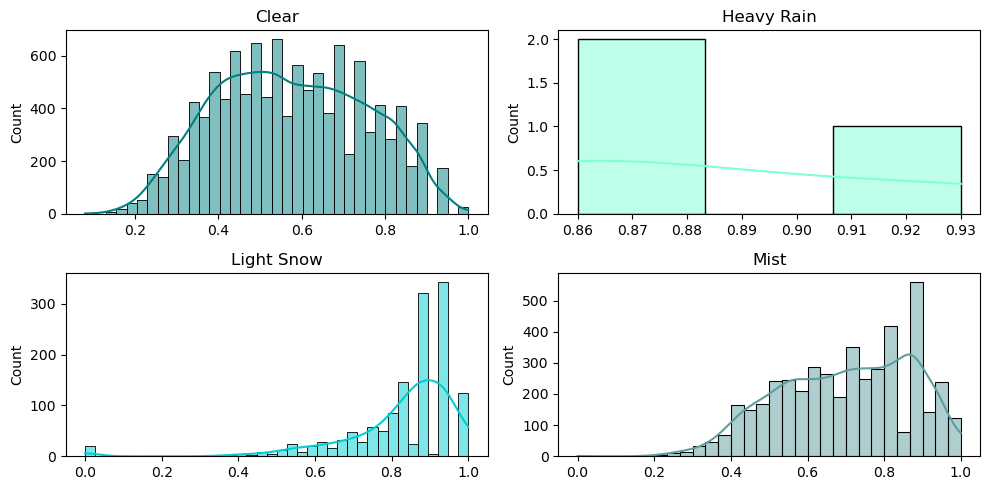

In [52]:
weather_type = ['Clear', 'Heavy Rain', 'Light Snow', 'Mist']
color = ['teal', 'Aquamarine', 'DarkTurquoise', 'CadetBlue']

fig, axes = plt.subplots(2,2, figsize=(10,5))
axes = axes.flatten()
for i in range(len(weather_type)):
    sns.histplot(data_hum.loc[weather_type[i]], kde=True, color=color[i], ax=axes[i])
    axes[i].set_title(weather_type[i])

plt.tight_layout()
plt.show()

#### Clear days have a wide range of humidity values, heavy rains days have a specific humidity, light snow and mist days have higher humidity

### Heat Map

In [53]:
# DataFrame with continuous data
data_num = data[['temp', 'temp_feel', 'humidity','windspeed', 'casual', 'registered', 'count']].copy() # numerical values
data_num.sample(5)

,temp,temp_feel,humidity,windspeed,casual,registered,count
11784,0.42,0.4242,0.47,0.1642,3,23,26
13439,0.72,0.6818,0.70,0.1045,0,8,8
8421,0.46,0.4545,0.63,0.0000,21,167,188
15449,0.46,0.4545,0.55,0.2985,27,170,197
3892,0.60,0.6212,0.56,0.0896,1,4,5


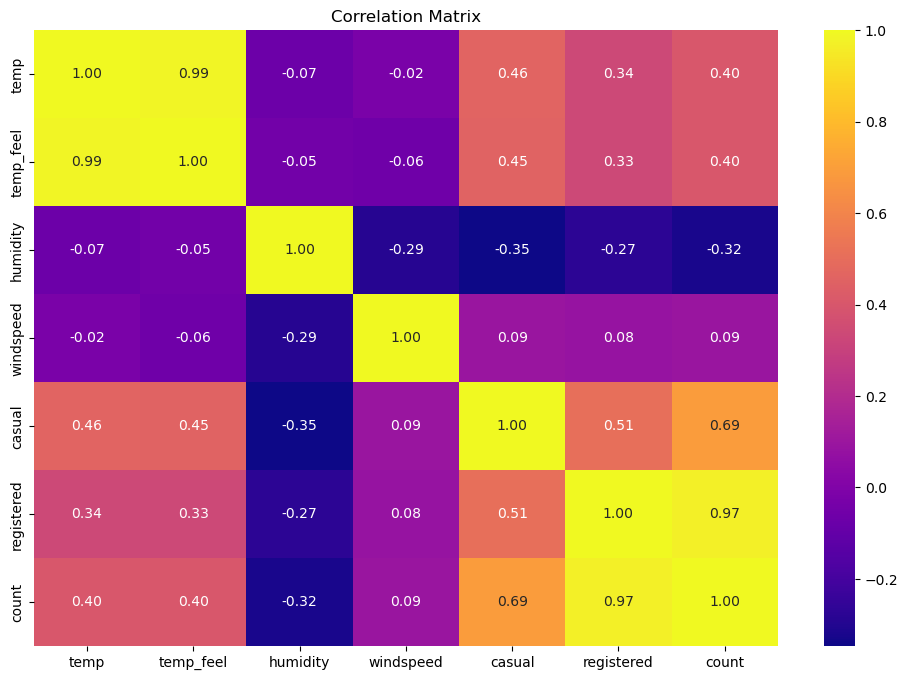

In [54]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_num.corr(), annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### There is a moderate positive correlation between bikes rented and normalized temperature and feels-like temperature
#### There is a moderate negative correlation between humidity and bikes rented
#### Windspeed almost has no correlation with bikes rented

### Finding Outliers

In [55]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the Bike rent counts to find outliers with the other normalized data
scaler = MinMaxScaler()
norm = scaler.fit_transform(data[['casual', 'registered', 'count']])
norm

array([[0.01086957, 0.01578354, 0.01536885],
       [0.02445652, 0.03720406, 0.03995902],
       [0.01630435, 0.03156708, 0.0317623 ],
       ...,
       [0.02173913, 0.09470124, 0.09118852],
       [0.03804348, 0.05524239, 0.06147541],
       [0.03532609, 0.04284104, 0.04918033]])

In [56]:
temp_df = pd.DataFrame(norm, columns = ['casual', 'registered', 'count']) # make a dataframe with column names for normalised data
data_normalized = pd.concat([data_num[['temp', 'temp_feel', 'humidity','windspeed']], temp_df], axis = 1) # concat the normalized datafrmae into one

In [57]:
data_normalized.head()

,temp,temp_feel,humidity,windspeed,casual,registered,count
0,0.24,0.2879,0.810,0.0,0.010870,0.015784,0.015369
1,0.22,0.2727,0.800,0.0,0.024457,0.037204,0.039959
2,0.22,0.2727,0.775,0.0,0.016304,0.031567,0.031762
3,0.24,0.2879,0.750,0.0,0.010870,0.012401,0.012295
4,0.24,0.2879,0.750,0.0,0.002717,0.002255,0.000000


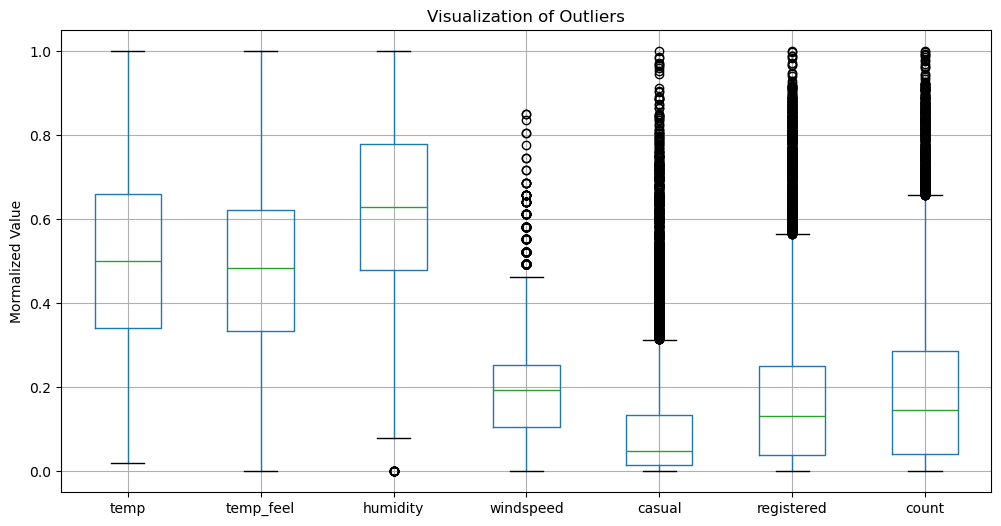

In [58]:
# Plot outliers
plt.figure(figsize=(12, 6))
data_normalized.boxplot()
plt.title('Visualization of Outliers')
plt.ylabel('Mormalized Value')
plt.show()

In [59]:
# Find outliers in each Column
Q1 = data_normalized.quantile(0.25)
Q3 = data_normalized.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = data_normalized[(data_normalized < lower_bound) | (data_normalized > upper_bound)]

print("Number of outliers by Feature")
outliers.count()

Number of outliers by Feature


temp             0
temp_feel        0
humidity        22
windspeed      341
casual        1192
registered     680
count          505
dtype: int64

In [60]:
# Percentage of Outliers in each column
import numpy as np
data_outlier = pd.DataFrame({'Outlier_Count' : outliers.count().values, 'Percentage': np.round((outliers.count().values/len(data))*100, 2)},
                            index = list(outliers.count().index))

In [61]:
data_outlier

,Outlier_Count,Percentage
temp,0,0.00
temp_feel,0,0.00
humidity,22,0.13
windspeed,341,1.96
casual,1192,6.86
registered,680,3.91
count,505,2.91


In [62]:
data = data.drop('instant', axis=1)
data

,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,temp_feel,humidity,windspeed,casual,registered,count
0,2011-01-01,spring,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.810,0.0000,3,13,16
1,2011-01-01,spring,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.800,0.0000,8,32,40
2,2011-01-01,spring,2011,1,2,No,6,No work,Clear,0.22,0.2727,0.775,0.0000,5,27,32
3,2011-01-01,spring,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.750,0.0000,3,10,13
4,2011-01-01,spring,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.750,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,spring,2012,12,19,No,1,Working Day,Mist,0.26,0.2576,0.600,0.1642,11,108,119
17375,2012-12-31,spring,2012,12,20,No,1,Working Day,Mist,0.26,0.2576,0.600,0.1642,8,81,89
17376,2012-12-31,spring,2012,12,21,No,1,Working Day,Clear,0.26,0.2576,0.600,0.1642,7,83,90
17377,2012-12-31,spring,2012,12,22,No,1,Working Day,Clear,0.26,0.2727,0.560,0.1343,13,48,61


### Label Encoding

In [63]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
data['season'] = label_encoder.fit_transform(data['season'])
data['holiday'] = label_encoder.fit_transform(data['holiday'])
data['workingday'] = label_encoder.fit_transform(data['workingday'])
data['weather'] = label_encoder.fit_transform(data['weather'])


In [64]:
data

,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,temp_feel,humidity,windspeed,casual,registered,count
0,2011-01-01,1,2011,1,0,0,6,0,0,0.24,0.2879,0.810,0.0000,3,13,16
1,2011-01-01,1,2011,1,1,0,6,0,0,0.22,0.2727,0.800,0.0000,8,32,40
2,2011-01-01,1,2011,1,2,0,6,0,0,0.22,0.2727,0.775,0.0000,5,27,32
3,2011-01-01,1,2011,1,3,0,6,0,0,0.24,0.2879,0.750,0.0000,3,10,13
4,2011-01-01,1,2011,1,4,0,6,0,0,0.24,0.2879,0.750,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,2012,12,19,0,1,1,3,0.26,0.2576,0.600,0.1642,11,108,119
17375,2012-12-31,1,2012,12,20,0,1,1,3,0.26,0.2576,0.600,0.1642,8,81,89
17376,2012-12-31,1,2012,12,21,0,1,1,0,0.26,0.2576,0.600,0.1642,7,83,90
17377,2012-12-31,1,2012,12,22,0,1,1,0,0.26,0.2727,0.560,0.1343,13,48,61


In [65]:
data['year'] = data['year'].astype(int)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        17379 non-null  datetime64[ns]
 1   season      17379 non-null  int32         
 2   year        17379 non-null  int32         
 3   month       17379 non-null  int32         
 4   hour        17379 non-null  int64         
 5   holiday     17379 non-null  int32         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int32         
 8   weather     17379 non-null  int32         
 9   temp        17379 non-null  float64       
 10  temp_feel   17379 non-null  float64       
 11  humidity    17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int32         
 14  registered  17379 non-null  int32         
 15  count       17379 non-null  int32         
dtypes: datetime64[ns](1), 

# Model Building

In [67]:
pip  install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [68]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
#from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [69]:
data

,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,temp_feel,humidity,windspeed,casual,registered,count
0,2011-01-01,1,2011,1,0,0,6,0,0,0.24,0.2879,0.810,0.0000,3,13,16
1,2011-01-01,1,2011,1,1,0,6,0,0,0.22,0.2727,0.800,0.0000,8,32,40
2,2011-01-01,1,2011,1,2,0,6,0,0,0.22,0.2727,0.775,0.0000,5,27,32
3,2011-01-01,1,2011,1,3,0,6,0,0,0.24,0.2879,0.750,0.0000,3,10,13
4,2011-01-01,1,2011,1,4,0,6,0,0,0.24,0.2879,0.750,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,2012,12,19,0,1,1,3,0.26,0.2576,0.600,0.1642,11,108,119
17375,2012-12-31,1,2012,12,20,0,1,1,3,0.26,0.2576,0.600,0.1642,8,81,89
17376,2012-12-31,1,2012,12,21,0,1,1,0,0.26,0.2576,0.600,0.1642,7,83,90
17377,2012-12-31,1,2012,12,22,0,1,1,0,0.26,0.2727,0.560,0.1343,13,48,61


In [70]:
from sklearn.model_selection import train_test_split

X = data.drop(['date', 'count'], axis=1)
y = data['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Decision Trees
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

print("MAE : ",mean_absolute_error(y_test,y_pred_dt))
print("MSE : ",mean_squared_error(y_test, y_pred_dt))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,y_pred_dt)))
print("R^2 : ",r2_score(y_test, y_pred_dt))

MAE :  2.2669735327963174
MSE :  32.80149597238205
RMSE :  5.727259027875555
R^2 :  0.9989641222208089


In [72]:
# Random Forest
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

print("MAE : ",mean_absolute_error(y_test,y_pred_rf))
print("MSE : ",mean_squared_error(y_test, y_pred_rf))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print("R^2 : ",r2_score(y_test, y_pred_rf))

MAE :  0.9538262370540853
MSE :  7.396582048331416
RMSE :  2.71966579717645
R^2 :  0.9997664144649903


In [73]:
# Gradient Boosting
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)

print("MAE : ",mean_absolute_error(y_test,y_pred_gb))
print("MSE : ",mean_squared_error(y_test, y_pred_gb))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,y_pred_gb)))
print("R^2 : ",r2_score(y_test, y_pred_gb))

MAE :  3.2609926996870096
MSE :  28.47900948257467
RMSE :  5.336572821818763
R^2 :  0.9991006272055027


In [74]:
# Ada Boost
ab_reg = AdaBoostRegressor()
ab_reg.fit(X_train, y_train)
y_pred_ab = ab_reg.predict(X_test)

print("MAE : ",mean_absolute_error(y_test,y_pred_ab))
print("MSE : ",mean_squared_error(y_test, y_pred_ab))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,y_pred_ab)))
print("R^2 : ",r2_score(y_test, y_pred_ab))

MAE :  21.173001026716747
MSE :  676.0918872373421
RMSE :  26.00176700221241
R^2 :  0.9786488834756127


# XGBoost
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)

print("MAE : ",mean_absolute_error(y_test,y_pred_xgb))
print("MSE : ",mean_squared_error(y_test, y_pred_xgb))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,y_pred_xgb)))
print("R^2 : ",r2_score(y_test, y_pred_xgb))

# Feature Importance

In [75]:
# Decision Trees
dt_feature_importance = dt_reg.feature_importances_

# Creating a DataFrame to display feature importance
dt_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': dt_feature_importance})
dt_importance_df = dt_importance_df.sort_values(by='Importance', ascending=False)
pd.options.display.float_format = '{:.10f}'.format
dt_importance_df

,Feature,Importance
13,registered,0.9456657546
12,casual,0.0541676676
11,windspeed,0.0000402492
2,month,0.0000272016
8,temp,0.0000193974
10,humidity,0.0000183122
9,temp_feel,0.0000144258
5,weekday,0.0000137140
3,hour,0.0000136381
1,year,0.0000093284


In [76]:
# Random Forest
rf_feature_importance = rf_reg.feature_importances_

rf_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_feature_importance})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)
pd.options.display.float_format = '{:.10f}'.format
rf_importance_df

,Feature,Importance
13,registered,0.9475058620
12,casual,0.0522322688
10,humidity,0.0000465132
11,windspeed,0.0000374749
3,hour,0.0000357497
2,month,0.0000296053
8,temp,0.0000289822
9,temp_feel,0.0000258137
6,workingday,0.0000178528
5,weekday,0.0000172432


In [77]:
# Gradient Boosting
gb_feature_importance = gb_reg.feature_importances_

gb_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': gb_feature_importance})
gb_importance_df = gb_importance_df.sort_values(by='Importance', ascending=False)
pd.options.display.float_format = '{:.10f}'.format
gb_importance_df

,Feature,Importance
13,registered,0.9359149608
12,casual,0.0640677997
3,hour,0.0000063114
1,year,0.0000039304
6,workingday,0.0000018013
5,weekday,0.0000013799
2,month,0.0000013443
0,season,0.0000009174
10,humidity,0.0000006090
8,temp,0.0000004991


In [78]:
# Ada Boost
ab_feature_importance = ab_reg.feature_importances_

ab_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': ab_feature_importance})
ab_importance_df = ab_importance_df.sort_values(by='Importance', ascending=False)
pd.options.display.float_format = '{:.10f}'.format
ab_importance_df

,Feature,Importance
13,registered,0.8713802604
12,casual,0.1262859153
10,humidity,0.0013814058
9,temp_feel,0.0007181048
1,year,0.0002343137
0,season,0.0000000000
2,month,0.0000000000
3,hour,0.0000000000
4,holiday,0.0000000000
5,weekday,0.0000000000


# XGBoost
xgb_feature_importance = xgb_reg.feature_importances_

xgb_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_feature_importance})
xgb_importance_df = xgb_importance_df.sort_values(by='Importance', ascending=False)
pd.options.display.float_format = '{:.10f}'.format
xgb_importance_df

# Model Evaluation

In [79]:
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    return mae, mse, rmse, r2

# Define a function to store evaluation metrics in a DataFrame
def store_metrics_df(model_name, metrics):
    return pd.DataFrame({
        'Model': [model_name],
        'MAE': [metrics[0]],
        'MSE': [metrics[1]],
        'RMSE': [metrics[2]],
        'R^2': [metrics[3]]
    })

# Define the models (assuming you already have trained models)
models = {
    'Decision Tree': dt_reg.fit(X_train, y_train),
    'Random Forest': rf_reg,
    'Gradient Boosting': gb_reg,
    'AdaBoost': ab_reg,
    #'XGBoost': xgb_reg
}

# Evaluate models and store metrics in a DataFrame
metrics_list = []
for model_name, model in models.items():
    metrics = evaluate_model(model, X_test, y_test)
    metrics_df = store_metrics_df(model_name, metrics)
    metrics_list.append(metrics_df)

# Concatenate the metrics DataFrames
metrics_df = pd.concat(metrics_list, ignore_index=True)

# Set display format to avoid exponential notation
pd.options.display.float_format = '{:.6f}'.format

# Print the DataFrame
print(metrics_df)

               Model       MAE        MSE      RMSE      R^2
0      Decision Tree  2.250863  32.209436  5.675336 0.998983
1      Random Forest  0.953826   7.396582  2.719666 0.999766
2  Gradient Boosting  3.260993  28.479009  5.336573 0.999101
3           AdaBoost 21.173001 676.091887 26.001767 0.978649


## Hyperparameter Tuning

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
#Decision Tree
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8]
}

dt_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=dt_reg, param_grid=param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

# Evaluation metrics after tuning
best_dt = grid_search.best_estimator_
y_pred_dt = best_dt.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_dt)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
r2 = r2_score(y_test, y_pred_dt)
print("R^2:", r2)

Best parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mean Absolute Error: 2.160626806865299
Mean Squared Error: 29.70244132952602
Root Mean Squared Error: 5.44999461738505
R^2: 0.9990619909839816


In [82]:
#Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_reg = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

# Evaluation metrics after tuning
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
r2 = r2_score(y_test, y_pred_rf)
print("R^2:", r2)

Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mean Absolute Error: 0.9016474875335632
Mean Squared Error: 6.978139131824572
Root Mean Squared Error: 2.641616764753088
R^2: 0.999779628975677


In [83]:
#Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_reg = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

# Evaluation metrics after tuning
best_gb = grid_search.best_estimator_
y_pred_gb = best_gb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_gb)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(y_test, y_pred_gb)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
r2 = r2_score(y_test, y_pred_gb)
print("R^2:", r2)

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Mean Absolute Error: 1.2895770542579013
Mean Squared Error: 5.6944381081495345
Root Mean Squared Error: 2.386302182907591
R^2: 0.9998201685098089


In [84]:
# Ada boost
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

ada_reg = AdaBoostRegressor()
ada_grid_search = GridSearchCV(estimator=ada_reg, param_grid=ada_param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)
ada_grid_search.fit(X_train, y_train)
print("Best parameters for AdaBoost:", ada_grid_search.best_params_)

# Evaluation metrics after tuning for AdaBoost
best_ada = ada_grid_search.best_estimator_
y_pred_ada = best_ada.predict(X_test)
mae_ada = mean_absolute_error(y_test, y_pred_ada)
print("Mean Absolute Error (AdaBoost):", mae_ada)
mse_ada = mean_squared_error(y_test, y_pred_ada)
print("Mean Squared Error (AdaBoost):", mse_ada)
rmse_ada = np.sqrt(mse_ada)
print("Root Mean Squared Error (AdaBoost):", rmse_ada)
r2_ada = r2_score(y_test, y_pred_ada)
print("R^2 (AdaBoost):", r2_ada)

Best parameters for AdaBoost: {'learning_rate': 0.2, 'n_estimators': 200}
Mean Absolute Error (AdaBoost): 21.352930224537385
Mean Squared Error (AdaBoost): 678.8930620622984
Root Mean Squared Error (AdaBoost): 26.05557641009499
R^2 (AdaBoost): 0.978560421816448


# XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

xgb_reg = XGBRegressor()
xgb_grid_search = GridSearchCV(estimator=xgb_reg, param_grid=xgb_param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)

# Evaluation metrics after tuning for XGBoost
best_xgb = xgb_grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print("Mean Absolute Error (XGBoost):", mae_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error (XGBoost):", mse_xgb)
rmse_xgb = np.sqrt(mse_xgb)
print("Root Mean Squared Error (XGBoost):", rmse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("R^2 (XGBoost):", r2_xgb)

In [85]:
data

,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,temp_feel,humidity,windspeed,casual,registered,count
0,2011-01-01,1,2011,1,0,0,6,0,0,0.240000,0.287900,0.810000,0.000000,3,13,16
1,2011-01-01,1,2011,1,1,0,6,0,0,0.220000,0.272700,0.800000,0.000000,8,32,40
2,2011-01-01,1,2011,1,2,0,6,0,0,0.220000,0.272700,0.775000,0.000000,5,27,32
3,2011-01-01,1,2011,1,3,0,6,0,0,0.240000,0.287900,0.750000,0.000000,3,10,13
4,2011-01-01,1,2011,1,4,0,6,0,0,0.240000,0.287900,0.750000,0.000000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,2012,12,19,0,1,1,3,0.260000,0.257600,0.600000,0.164200,11,108,119
17375,2012-12-31,1,2012,12,20,0,1,1,3,0.260000,0.257600,0.600000,0.164200,8,81,89
17376,2012-12-31,1,2012,12,21,0,1,1,0,0.260000,0.257600,0.600000,0.164200,7,83,90
17377,2012-12-31,1,2012,12,22,0,1,1,0,0.260000,0.272700,0.560000,0.134300,13,48,61


In [86]:
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming your data preprocessing and feature engineering are already done and stored in `data`
X = data.drop(['date', 'count','casual','registered'], axis=1)
y = data['count']
print(X)
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Saving the model
with open('bike_model.pkl', 'wb') as file:
    pickle.dump(model, file)


       season  year  month  hour  holiday  weekday  workingday  weather  \
0           1  2011      1     0        0        6           0        0   
1           1  2011      1     1        0        6           0        0   
2           1  2011      1     2        0        6           0        0   
3           1  2011      1     3        0        6           0        0   
4           1  2011      1     4        0        6           0        0   
...       ...   ...    ...   ...      ...      ...         ...      ...   
17374       1  2012     12    19        0        1           1        3   
17375       1  2012     12    20        0        1           1        3   
17376       1  2012     12    21        0        1           1        0   
17377       1  2012     12    22        0        1           1        0   
17378       1  2012     12    23        0        1           1        0   

          temp  temp_feel  humidity  windspeed  
0     0.240000   0.287900  0.810000   0.000000  
1